<div style=" background-color: rgb(43, 197, 37);" >
<h2 style="margin: auto; padding: 20px 0; color:#fff; text-align: center">Data & tests statistiques
</h2>
</div>

In [106]:
import pandas as pd
import numpy as np
from matplotlib import image
import matplotlib.pyplot as plt 
import seaborn as sns

np.set_printoptions(precision=2)

import scipy.stats as stats
from scipy.stats import ttest_1samp
from scipy.stats import f_oneway
from scipy.stats import chi2
from scipy.stats import chi2_contingency
from scipy.stats import pearsonr
from scipy.stats import kstest
from scipy.stats import linregress

In [47]:
df_stat = pd.read_csv('../Source/Data_processed/lapage_all.csv', sep=';', index_col=['Timestamp'] , parse_dates=True)

In [48]:
df_stat['categ'] = df_stat['categ'].astype(str)
df_stat['month'] = df_stat.index.month #ajout d'une colonne mois pour stratifier les échantillons plus tard
df_stat.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 687534 entries, 2021-03-01 00:01:07.843138 to 2023-02-28 23:58:30.792755
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   id_prod     687534 non-null  object 
 1   session_id  687534 non-null  object 
 2   client_id   687534 non-null  object 
 3   sex         687534 non-null  object 
 4   birth       687534 non-null  int64  
 5   price       687534 non-null  float64
 6   categ       687534 non-null  object 
 7   age         687534 non-null  int64  
 8   age_group   687534 non-null  object 
 9   month       687534 non-null  int32  
dtypes: float64(1), int32(1), int64(2), object(6)
memory usage: 55.1+ MB


In [49]:
# Création de la colonne combinée 'strata'
df_stat['strat_sex_categ_mois'] = df_stat['categ'] + "_" + df_stat['sex'] + "_" + df_stat['month'].astype(str)
df_stat

,id_prod,session_id,client_id,sex,birth,price,categ,age,age_group,month,strat_sex_categ_mois
Timestamp,,,,,,,,,,,
2021-03-01 00:01:07.843138,0_1259,s_1,c_329,f,1967,11.99,0,56,56-65,3,0_f_3
2021-03-01 00:02:26.047414,0_1390,s_2,c_664,m,1960,19.37,0,63,56-65,3,0_m_3
2021-03-01 00:02:38.311413,0_1352,s_3,c_580,m,1988,4.50,0,35,36-45,3,0_m_3
2021-03-01 00:04:54.559692,0_1458,s_4,c_7912,f,1989,6.55,0,34,26-35,3,0_f_3
2021-03-01 00:05:18.801198,0_1358,s_5,c_2033,f,1956,16.49,0,67,66+,3,0_f_3
...,...,...,...,...,...,...,...,...,...,...,...
2023-02-28 23:49:03.148402,1_508,s_348444,c_3573,f,1996,21.92,1,27,26-35,2,1_f_2
2023-02-28 23:51:29.318531,2_37,s_348445,c_50,f,1994,48.99,2,29,26-35,2,2_f_2
2023-02-28 23:53:18.929676,1_695,s_348446,c_488,f,1985,26.99,1,38,36-45,2,1_f_2


#### Mes données sont-elles numériques (quantitatives) ou catégoriques (qualitatives) ?
- J'ai 2 variables quantitative et 5 variables catégoriques
#### Ecrire toutes les questions que je me pose

#### Quel est le nombre de groupes ou de variables que je compare ?

#### Quel est l'objectif de mon étude ? Que cherche-je à déterminer ou à comparer ?

<div style=" background-color: rgb(343, 197, 37);" >
<h2 style="margin: auto; padding: 20px 0; color:#fff; text-align: center"> Partie 1 - Test de normalité des données
</h2>
</div>

----
## Test de normalité sur une variable : prix
---

---
### 1.1 Choisir la variable à tester (variable quanti) -> Prix
---

In [50]:
df_stat['price'].head(2)

Timestamp
2021-03-01 00:01:07.843138    11.99
2021-03-01 00:02:26.047414    19.37
Name: price, dtype: float64

#### H0 : la variable prix suit une loi normal p > 0,05
#### H1 : la variable prix ne suit pas une loi normal p < 0,05


---
### 1.2 - Décrire la variable (moyenne , écart-type (std) , variance (var) 
---

In [51]:
print(f"la moyenne (x barre) théorique est {round(df_stat['price'].mean(), 2)}")
print(f"l'écart type ou stand.dev. (sigma) théorique est {round(df_stat['price'].std(), 2)}")
print(f"la variance (sigma carré) théorique est de {round(df_stat['price'].var(), 2)}")

la moyenne (x barre) théorique est 17.49
l'écart type ou stand.dev. (sigma) théorique est 18.24
la variance (sigma carré) théorique est de 332.64


---
### 1.3 - Détérminer un échantillon (mathématiquement)
---

In [52]:
## Fixation de la taille de l'échantillon       
import math

# Paramètres
marge_erreur = 1
niveau_confiance = 0.95
ecart_type_estime = 18.24  # Écart-type estimé des prix dans votre dataset

# Z-score pour un niveau de confiance de 95%
z_score = 1.96  # Pour un niveau de confiance de 95%

# Taille de l'échantillon
taille_echantillon_prix = (z_score * ecart_type_estime / marge_erreur) ** 2
taille_echantillon_prix = math.ceil(taille_echantillon_prix)  # Arrondir à l'entier supérieur

display("Taille d'échantillon nécessaire :", taille_echantillon_prix)


"Taille d'échantillon nécessaire :"

1279

---
### 1.4 - Stratifié l'échantillon pour fiabiliser la représentativité des données
---

- le sexe (650 hommes et 650 femmes)

In [53]:
from sklearn.model_selection import StratifiedShuffleSplit

taille_echantillon_prix = 1300 #je fixe la taille de l'échantillon à 1300

sss = StratifiedShuffleSplit(n_splits=40, test_size=taille_echantillon_prix, random_state=9000) #j'initialise l'objet StratifiedShuffleSplit pour générer un échantillon stratifié de 1300 individus

for train_index, test_index in sss.split(df_stat, df_stat['strat_sex_categ_mois']): #je génère l'échantillon stratifié selon la variable sex
    echantillon_stratifie = df_stat.iloc[test_index] #je récupère l'échantillon stratifié
    
print(echantillon_stratifie.head(1)) #j'affiche la premières lignes de l'échantillon stratifié
display("-----------------------------")
print(echantillon_stratifie['strat_sex_categ_mois'].value_counts()) #je vérifie

                           id_prod session_id client_id sex  birth  price  \
Timestamp                                                                   
2022-06-21 09:01:11.445894   1_475   s_226982    c_1746   m   1994  20.99   

                           categ  age age_group  month strat_sex_categ_mois  
Timestamp                                                                    
2022-06-21 09:01:11.445894     1   29     26-35      6                1_m_6  


'-----------------------------'

strat_sex_categ_mois
0_m_9     39
0_f_9     37
0_f_5     35
0_m_12    35
0_m_10    35
          ..
2_m_12     2
2_m_9      2
2_f_3      2
2_f_9      2
2_f_10     2
Name: count, Length: 72, dtype: int64


---
### 1.5 - Appliquer le test de Kosmogorov-Smirnov
---

In [54]:
moyenne_empirique_prix =echantillon_stratifie['price'].mean() #je calcule la moyenne des prix dans l'échantillon stratifié
variante_empirique_prix = echantillon_stratifie['price'].std() #je calcule l'écart-type des prix dans l'échantillon stratifié
display(round(moyenne_empirique_prix, 2))
display(round(variante_empirique_prix, 2))
display("-----------------------------")

stat, p_value = kstest(echantillon_stratifie['price'], 'norm', args=(moyenne_empirique_prix, np.sqrt(variante_empirique_prix))) #je teste la normalité de la distribution des prix dans l'échantillon stratifié

display("-----------------------------")

print("Statistique de test KS:", round(stat, 5), 'un resultat proche de 0 indique que la distribution des prix est normale')
print("Valeur p:", np.format_float_positional(p_value, precision=2), ': un resultat supérieur à 0.05 indique que la distribution des prix est normale')

display("-----------------------------")

alpha = 0.05 #je fixe la région critique à 5%
if p_value > alpha:
    print("La distribution des prix est normale -> l'hypothèse nulle H0 n'est pas rejetée")
else:
    print("La distribution des prix n'est pas normale -> l'hypothèse nulle H0 est rejetée")
    

16.92

16.77

'-----------------------------'

'-----------------------------'

Statistique de test KS: 0.31783 un resultat proche de 0 indique que la distribution des prix est normale
Valeur p: 0.00 : un resultat supérieur à 0.05 indique que la distribution des prix est normale


'-----------------------------'

La distribution des prix n'est pas normale -> l'hypothèse nulle H0 est rejetée



<div style=" background-color: rgb(343, 197, 37);" >
<h2 style="padding: 10px; color: white; text-align: center" > Representation graphique
</h2>
</div>

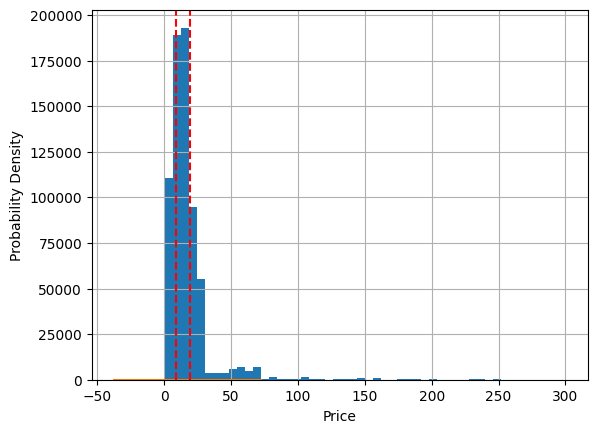

In [55]:
df_stat['price'].hist(bins=50)

# Generate data for the normal distribution
mu = df_stat['price'].mean()
sigma = df_stat['price'].std()
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
y = stats.norm.pdf(x, mu, sigma)

# Plot the normal distribution curve
plt.plot(x, y)
plt.axvline(x=np.percentile(df_stat['price'], 25), color='r', linestyle='--')
plt.axvline(x=np.percentile(df_stat['price'], 75), color='r', linestyle='--')
plt.xlabel('Price')
plt.ylabel('Probability Density')
plt.show()

---
### On retiens l'hypothèse alternative H1 : la variable prix ne suit pas une loi normal p > 0.05
---

<div style="background-color: rgb(343, 197, 37);" >
</div>

----
## Test de normalité sur une variable : année de naissance
---

#### H0 : la variable naissance suit une loi normal p > 0,05
#### H1 : la variable naissance ne suit pas une loi normal p < 0,05


In [56]:
# choix de la variable à étudier : année de naissance
df_stat['birth'].head(2)   

Timestamp
2021-03-01 00:01:07.843138    1967
2021-03-01 00:02:26.047414    1960
Name: birth, dtype: int64

In [57]:
print(f"la moyenne (x barre) théorique est {round(df_stat['birth'].mean(), 2)}")
print(f"l'écart type ou stand.dev. (sigma) théorique est {round(df_stat['birth'].std(), 2)}")
print(f"la variance (sigma carré) théorique est de {round(df_stat['birth'].var(), 2)}")

la moyenne (x barre) théorique est 1977.82
l'écart type ou stand.dev. (sigma) théorique est 13.61
la variance (sigma carré) théorique est de 185.18


In [58]:
## Fixation de la taille de l'échantillon       
# Paramètres
marge_erreur = 1
niveau_confiance = 0.95
ecart_type_estime = 13.61  # Écart-type estimé des prix dans votre dataset

# Z-score pour un niveau de confiance de 95%
z_score = 1.96  # Pour un niveau de confiance de 95%

# Taille de l'échantillon
taille_echantillon_naissance = (z_score * ecart_type_estime / marge_erreur) ** 2
taille_echantillon_naissance = math.ceil(taille_echantillon_naissance)  # Arrondir à l'entier supérieur

display("Taille d'échantillon nécessaire :", taille_echantillon_naissance)

"Taille d'échantillon nécessaire :"

712

In [59]:
taille_echantillon_naissance = 750 #je fixe la taille de l'échantillon à 750

sss2 = StratifiedShuffleSplit(n_splits=40, test_size=taille_echantillon_naissance, random_state=9000) #j'initialise l'objet StratifiedShuffleSplit pour générer un échantillon stratifié de 1300 individus

for train_index, test_index in sss.split(df_stat, df_stat['strat_sex_categ_mois']): #je génère l'échantillon stratifié selon la variable sex
    echantillon_stratifie_naissance = df_stat.iloc[test_index] #je récupère l'échantillon stratifié
    
print(echantillon_stratifie_naissance.head(1)) #j'affiche la premières lignes de l'échantillon stratifié
display("-----------------------------")
print(echantillon_stratifie_naissance['strat_sex_categ_mois'].value_counts()) #je vérifie

                           id_prod session_id client_id sex  birth  price  \
Timestamp                                                                   
2022-06-21 09:01:11.445894   1_475   s_226982    c_1746   m   1994  20.99   

                           categ  age age_group  month strat_sex_categ_mois  
Timestamp                                                                    
2022-06-21 09:01:11.445894     1   29     26-35      6                1_m_6  


'-----------------------------'

strat_sex_categ_mois
0_m_9     39
0_f_9     37
0_f_5     35
0_m_12    35
0_m_10    35
          ..
2_m_12     2
2_m_9      2
2_f_3      2
2_f_9      2
2_f_10     2
Name: count, Length: 72, dtype: int64


In [60]:
moyenne_empirique_naissance = echantillon_stratifie_naissance['birth'].mean() #je calcule la moyenne des années de naissance dans l'échantillon stratifié
display(round(moyenne_empirique_naissance, 2))
variante_empirique_naissance = echantillon_stratifie_naissance['birth'].var() #je calcule la variance des années de naissance dans l'échantillon stratifié
display(round(variante_empirique_naissance, 2))

1978.5

184.53

In [61]:
stat, p_value = kstest(echantillon_stratifie_naissance['birth'], 'norm', args=(moyenne_empirique_naissance, np.sqrt(variante_empirique_naissance))) #je teste la normalité de la distribution des années de naissance dans l'échantillon stratifié

display(f"Le resultat du test de normalité est :", {round(stat, 2)}, 'un resultat proche de 0 indique que la distribution des années de naissance est normale')
display(f"Le resultat du test de normalité est :", {round(p_value, 2)}, ': un resultat supérieur à 0.05 indique que la distribution des années de naissance est normale')

display("-----------------------------")

alpha = 0.05 #je fixe la région critique à 5%

if p_value > alpha:
    print("La distribution des années de naissance est normale -> l'hypothèse nulle H0 n'est pas rejetée")
else:
    print("La distribution des années de naissance n'est pas normale -> l'hypothèse nulle H0 est rejetée")

'Le resultat du test de normalité est :'

{0.08}

'un resultat proche de 0 indique que la distribution des années de naissance est normale'

'Le resultat du test de normalité est :'

{0.0}

': un resultat supérieur à 0.05 indique que la distribution des années de naissance est normale'

'-----------------------------'

La distribution des années de naissance n'est pas normale -> l'hypothèse nulle H0 est rejetée



<div style=" background-color: rgb(343, 197, 37);" >
<h2 style="padding: 10px; color: white; text-align: center" > Representation graphique
</h2>
</div>

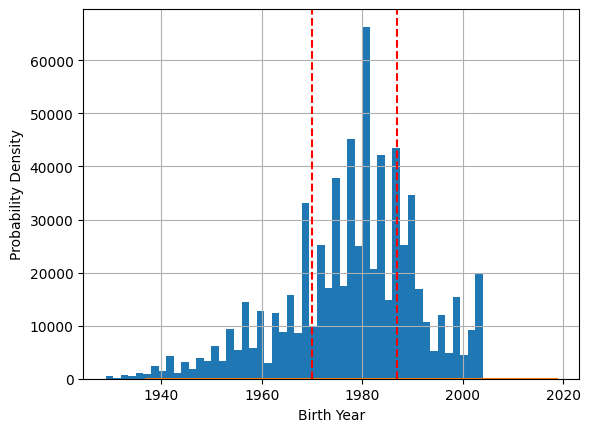

In [62]:
df_stat['birth'].hist(bins=50)

mu = df_stat['birth'].mean()
sigma = df_stat['birth'].std()
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
y = stats.norm.pdf(x, mu, sigma)

plt.plot(x, y)
plt.axvline(x=np.percentile(df_stat['birth'], 25), color='r', linestyle='--')
plt.axvline(x=np.percentile(df_stat['birth'], 75), color='r', linestyle='--')
plt.xlabel('Birth Year')
plt.ylabel('Probability Density')
plt.show()

---
### On retiens l'hypothèse alternative H1 : la variable naissance ne suit pas une loi normal p > 0.05
---

<div style="background-color: rgb(343, 197, 37);" >
</div>

In [63]:
df_stat

,id_prod,session_id,client_id,sex,birth,price,categ,age,age_group,month,strat_sex_categ_mois
Timestamp,,,,,,,,,,,
2021-03-01 00:01:07.843138,0_1259,s_1,c_329,f,1967,11.99,0,56,56-65,3,0_f_3
2021-03-01 00:02:26.047414,0_1390,s_2,c_664,m,1960,19.37,0,63,56-65,3,0_m_3
2021-03-01 00:02:38.311413,0_1352,s_3,c_580,m,1988,4.50,0,35,36-45,3,0_m_3
2021-03-01 00:04:54.559692,0_1458,s_4,c_7912,f,1989,6.55,0,34,26-35,3,0_f_3
2021-03-01 00:05:18.801198,0_1358,s_5,c_2033,f,1956,16.49,0,67,66+,3,0_f_3
...,...,...,...,...,...,...,...,...,...,...,...
2023-02-28 23:49:03.148402,1_508,s_348444,c_3573,f,1996,21.92,1,27,26-35,2,1_f_2
2023-02-28 23:51:29.318531,2_37,s_348445,c_50,f,1994,48.99,2,29,26-35,2,2_f_2
2023-02-28 23:53:18.929676,1_695,s_348446,c_488,f,1985,26.99,1,38,36-45,2,1_f_2


---
### test de normalité age
---

In [64]:
df_stat['age'].head(2)

Timestamp
2021-03-01 00:01:07.843138    56
2021-03-01 00:02:26.047414    63
Name: age, dtype: int64

#### H0 : la variable naissance suit une loi normal p > 0,05
#### H1 : la variable naissance ne suit pas une loi normal p < 0,05

In [65]:
print(f"la moyenne (x barre) théorique est {round(df_stat['age'].mean(), 2)}")
print(f"l'écart type ou stand.dev. (sigma) théorique est {round(df_stat['age'].std(), 2)}")
print(f"la variance (sigma carré) théorique est de {round(df_stat['age'].var(), 2)}")

la moyenne (x barre) théorique est 45.18
l'écart type ou stand.dev. (sigma) théorique est 13.61
la variance (sigma carré) théorique est de 185.18


In [66]:
## Fixation de la taille de l'échantillon       
# Paramètres
marge_erreur = 1
niveau_confiance = 0.95
ecart_type_estime = 13.61  # Écart-type estimé des prix dans votre dataset

# Z-score pour un niveau de confiance de 95%
z_score = 1.96  # Pour un niveau de confiance de 95%

# Taille de l'échantillon
taille_echantillon_age = (z_score * ecart_type_estime / marge_erreur) ** 2
taille_echantillon_age = math.ceil(taille_echantillon_age)  # Arrondir à l'entier supérieur

display("Taille d'échantillon nécessaire :", taille_echantillon_age)

"Taille d'échantillon nécessaire :"

712

In [67]:
taille_echantillon_age = 750 #je fixe la taille de l'échantillon à 750

sss2 = StratifiedShuffleSplit(n_splits=40, test_size=taille_echantillon_age, random_state=9000) #j'initialise l'objet StratifiedShuffleSplit pour générer un échantillon stratifié de 1300 individus

for train_index, test_index in sss.split(df_stat, df_stat['strat_sex_categ_mois']): #je génère l'échantillon stratifié selon la variable sex
    echantillon_stratifie_age = df_stat.iloc[test_index] #je récupère l'échantillon stratifié
    
print(echantillon_stratifie_age.head(1)) #j'affiche la premières lignes de l'échantillon stratifié
display("-----------------------------")
print(echantillon_stratifie_age['strat_sex_categ_mois'].value_counts()) #je vérifie

                           id_prod session_id client_id sex  birth  price  \
Timestamp                                                                   
2022-06-21 09:01:11.445894   1_475   s_226982    c_1746   m   1994  20.99   

                           categ  age age_group  month strat_sex_categ_mois  
Timestamp                                                                    
2022-06-21 09:01:11.445894     1   29     26-35      6                1_m_6  


'-----------------------------'

strat_sex_categ_mois
0_m_9     39
0_f_9     37
0_f_5     35
0_m_12    35
0_m_10    35
          ..
2_m_12     2
2_m_9      2
2_f_3      2
2_f_9      2
2_f_10     2
Name: count, Length: 72, dtype: int64


In [68]:
moyenne_empirique_age = echantillon_stratifie_age['age'].mean() #je calcule la moyenne des années de naissance dans l'échantillon stratifié
display(round(moyenne_empirique_age, 2))
variante_empirique_age = echantillon_stratifie_age['age'].var() #je calcule la variance des années de naissance dans l'échantillon stratifié
display(round(variante_empirique_age, 2))

44.5

184.53

In [69]:
stat, p_value = kstest(echantillon_stratifie_age['age'], 'norm', args=(moyenne_empirique_age, np.sqrt(moyenne_empirique_age))) #je teste la normalité de la distribution des années de naissance dans l'échantillon stratifié

display(f"Le resultat du test de normalité est :", {round(stat, 2)}, 'un resultat proche de 0 indique que la distribution des années de naissance est normale')
display(f"Le resultat du test de normalité est :", {round(p_value, 2)}, ': un resultat supérieur à 0.05 indique que la distribution des années de naissance est normale')

display("-----------------------------")

alpha = 0.05 #je fixe la région critique à 5%

if p_value > alpha:
    print("La distribution des années de naissance est normale -> l'hypothèse nulle H0 n'est pas rejetée")
else:
    print("La distribution des années de naissance n'est pas normale -> l'hypothèse nulle H0 est rejetée")

'Le resultat du test de normalité est :'

{0.18}

'un resultat proche de 0 indique que la distribution des années de naissance est normale'

'Le resultat du test de normalité est :'

{0.0}

': un resultat supérieur à 0.05 indique que la distribution des années de naissance est normale'

'-----------------------------'

La distribution des années de naissance n'est pas normale -> l'hypothèse nulle H0 est rejetée



---
### Test de corrélation entre le genre et la catégorie de produit : Test du Chi-carré d'Indépendance
---

### -> Question : La proportion de catégorie de produits est la même chez les Hommes et Femmes ?

#### H0 : Le genre du client est indépendant de la catégorie de produit acheter. (proportion équivalente entre H et F)

#### H1 : Le genre du client est corréler à la catégorie de produit acheter. (au moins une des catég et davantage choisi selon le genre)

In [75]:
#Variables qualitatives (catégoriques)
correl_age_categ = df_stat[['sex', 'categ']]
correl_age_categ

,sex,categ
Timestamp,,
2021-03-01 00:01:07.843138,f,0
2021-03-01 00:02:26.047414,m,0
2021-03-01 00:02:38.311413,m,0
2021-03-01 00:04:54.559692,f,0
2021-03-01 00:05:18.801198,f,0
...,...,...
2023-02-28 23:49:03.148402,f,1
2023-02-28 23:51:29.318531,f,2
2023-02-28 23:53:18.929676,f,1


### Création du tableau de contingence/fréquence de Khi2 d'indépendence

In [74]:
df_contingence = pd.crosstab(correl_age_categ['sex'], correl_age_categ['categ'])
df_contingence

categ,0,1,2
sex,,,
f,206103,119307,17283
m,209356,116285,19200


In [79]:
# Calculer le test du Khi2 d'indépendance
chi2, p, dof, expected = chi2_contingency(df_contingence)

# Afficher les résultats
print(f"Chi2 Statistique: {chi2}")
print('---------------------------------')
print(f"P-valeur: {p}")
print('---------------------------------')
print(f"Degrés de liberté: {dof}")
print('---------------------------------')
print("Fréquences attendues:\n", expected)
print('---------------------------------')

alpha = 0.05
if p < alpha:
    print("Le genre du client est indépendant de la catégorie de produit acheter. (proportion équivalente entre H et F)")
else:
    print("Le genre du client est corréler à la catégorie de produit acheter. (au moins une des catég et davantage choisi selon le genre)")

Chi2 Statistique: 158.25417617304882
---------------------------------
P-valeur: 4.3205822283997063e-35
---------------------------------
Degrés de liberté: 2
---------------------------------
Fréquences attendues:
 [[207080.51 117427.98  18184.51]
 [208378.49 118164.02  18298.49]]
---------------------------------
Le genre du client est indépendant de la catégorie de produit acheter. (proportion équivalente entre H et F)



<div style=" background-color: rgb(343, 197, 37);" >
<h2 style="padding: 10px; color: white; text-align: center" > Representation graphique
</h2>
</div>

Text(120.72222222222221, 0.5, 'Sexe')

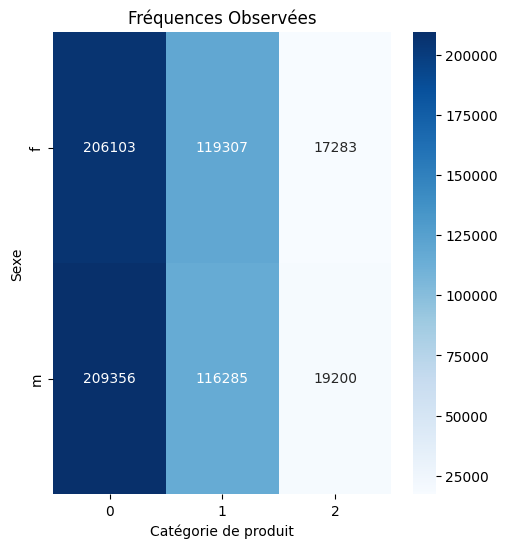

In [93]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.heatmap(df_contingence, annot=True, fmt='d', cmap='Blues')
plt.title('Fréquences Observées')
plt.xlabel('Catégorie de produit')
plt.ylabel('Sexe')

---
#### On retient H0 : Le genre est indépendant de la catégorie de produit. (proportion équivalente entre H et F)
---

<div style="background-color: rgb(343, 197, 37);" >
</div>


---
### Test de corrélation entre l'âge et le montant d'achat : Coeff de corrélation de Pearson
---

### -> Question : Le montant d'achat est-il corréler à l'âge d'un individu ?

#### H0 : Il n'y a pas de corrélation entre l'âge et le montant d'achat dans la population. => coeff = 0

#### H1 : Il y a une corrélation entre l'âge et le montant d'achat dans la population. => coeff != 0

In [97]:
df_coeff_correl = df_stat[['price', 'age']]
df_coeff_correl

,price,age
Timestamp,,
2021-03-01 00:01:07.843138,11.99,56
2021-03-01 00:02:26.047414,19.37,63
2021-03-01 00:02:38.311413,4.50,35
2021-03-01 00:04:54.559692,6.55,34
2021-03-01 00:05:18.801198,16.49,67
...,...,...
2023-02-28 23:49:03.148402,21.92,27
2023-02-28 23:51:29.318531,48.99,29
2023-02-28 23:53:18.929676,26.99,38


In [105]:
# Calcul de la corrélation et de la p-valeur
correlation, p_value = pearsonr(df_coeff_correl['age'], df_coeff_correl['price'])

print(f"Coefficient de corrélation: {correlation}")
print('---------------------------------')
print(f"P-valeur: {p_value}")
print('---------------------------------')

alpha = 0.005 #je fixe la région critique à 0,5% pour m'assurer de la corrélation
if p_value < alpha: #je teste si la p-valeur(proba d'avoir l'age et le montant d'achat ensemble) est inférieure à 1%
    print("H1 validé ; Une corrélation existe entre l'âge et le prix des produits => coeff != 0")
else:
    print("H0 validé ; Aucune corrélation n'existe entre l'âge et le prix => coeff = 0")


Coefficient de corrélation: -0.20749608778819795
---------------------------------
P-valeur: 0.0
---------------------------------
H1 validé ; Une corrélation existe entre l'âge et le prix des produits => coeff != 0



<div style=" background-color: rgb(343, 197, 37);" >
<h2 style="padding: 10px; color: white; text-align: center" > Representation graphique
</h2>
</div>

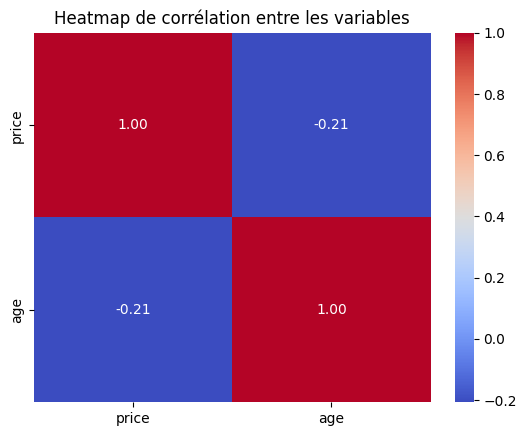

In [111]:
sns.heatmap(df_coeff_correl.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap de corrélation entre les variables')
plt.show()

---
#### On retient H1 : Il y a une corrélation entre l'âge et le montant d'achat dans la population. => coeff != 0
---

#### Interprétaiton : le montant d'achat à tendance à baisser avec l'âge (coeff négatif mais non proche de -1)

<div style="background-color: rgb(343, 197, 37);" >
</div>


---
### Test de corrélation entre l'âge et la fréquence d'achat
---


---
### Test de corrélation entre l'âge et la taille du panier moyen
---


---
### Test de corrélation entre l'âge et la catégorie de produit
---